In [1]:
!pip install kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"elifyzer","key":"541f81a2592ea833491df22e77410152"}'}

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d sobhanmoosavi/us-accidents

 99% 230M/232M [00:02<00:00, 95.9MB/s]
100% 232M/232M [00:02<00:00, 112MB/s] 


In [4]:
from zipfile import ZipFile 
file_name = "us-accidents.zip"

with ZipFile(file_name,'r') as zip_:
  zip_.extractall()
  print('Done')

Done


In [5]:
import numpy as np
import pandas as pd
import time

In [6]:
data_path=("/content/US_Accidents_June20.csv")

In [7]:
def reduce_mem(df):
    starttime = time.time()
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if pd.isnull(c_min) or pd.isnull(c_max):
                continue
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
    end_mem = df.memory_usage().sum() / 1024**2
    print('-- Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction),time spend:{:2.2f} min'.format(end_mem,
                                                                                                           100*(start_mem-end_mem)/start_mem,
                                                                                                           (time.time()-starttime)/60))
    return df

In [8]:
df = reduce_mem(pd.read_csv(data_path))

-- Mem. usage decreased to 710.38 Mb (29.6% reduction),time spend:0.02 min


**Overwiev**


In [9]:
display(df)

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.87500,-84.0625,NaN,NaN,0.010002,Right lane blocked due to accident on I-70 Eas...,NaN,I-70 E,R,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.90625,NaN,91.0,29.687500,10.0,Calm,NaN,0.020004,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.93750,-82.8125,NaN,NaN,0.010002,Accident on Brice Rd at Tussing Rd. Expect del...,2584.0,Brice Rd,L,Reynoldsburg,Franklin,OH,43068-3402,US,US/Eastern,KCMH,2016-02-08 05:51:00,37.90625,NaN,100.0,29.656250,10.0,Calm,NaN,0.000000,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.06250,-84.0625,NaN,NaN,0.010002,Accident on OH-32 State Route 32 Westbound at ...,NaN,State Route 32,R,Williamsburg,Clermont,OH,45176,US,US/Eastern,KI69,2016-02-08 06:56:00,36.00000,33.3125,100.0,29.671875,10.0,SW,3.500000,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.75000,-84.1875,NaN,NaN,0.010002,Accident on I-75 Southbound at Exits 52 52B US...,NaN,I-75 S,R,Dayton,Montgomery,OH,45417,US,US/Eastern,KDAY,2016-02-08 07:38:00,35.09375,31.0000,96.0,29.640625,9.0,SW,4.601562,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.62500,-84.1875,NaN,NaN,0.010002,Accident on McEwen Rd at OH-725 Miamisburg Cen...,NaN,Miamisburg Centerville Rd,R,Dayton,Montgomery,OH,45459,US,US/Eastern,KMGY,2016-02-08 07:53:00,36.00000,33.3125,89.0,29.656250,6.0,SW,3.500000,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3513612,A-3513776,Bing,NaN,2,2019-08-23 18:03:25,2019-08-23 18:32:01,34.00000,-117.3750,34.00000,-117.375,0.542969,At Market St - Accident.,NaN,Pomona Fwy E,R,Riverside,Riverside,CA,92501,US,US/Pacific,KRAL,2019-08-23 17:53:00,86.00000,86.0000,40.0,28.921875,10.0,W,13.000000,0.000000,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
3513613,A-3513777,Bing,NaN,2,2019-08-23 19:11:30,2019-08-23 19:38:23,32.78125,-117.1250,32.75000,-117.125,0.337891,At Camino Del Rio/Mission Center Rd - Accident.,NaN,I-8 W,R,San Diego,San Diego,CA,92108,US,US/Pacific,KMYF,2019-08-23 18:53:00,70.00000,70.0000,73.0,29.390625,10.0,SW,6.000000,0.000000,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
3513614,A-3513778,Bing,NaN,2,2019-08-23 19:00:21,2019-08-23 19:28:49,33.78125,-117.8750,33.78125,-117.875,0.561035,At Glassell St/Grand Ave - Accident. in the ri...,NaN,Garden Grove Fwy,R,Orange,Orange,CA,92866,US,US/Pacific,KSNA,2019-08-23 18:53:00,73.00000,73.0000,64.0,29.734375,10.0,SSW,10.000000,0.000000,Partly Cloudy,False,False,False,False,True,False,False,False,False,False,False,False,False,Day,Day,Day,Day
3513615,A-3513779,Bing,NaN,2,2019-08-23 19:00:21,2019-08-23 19:29:42,34.00000,-118.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3513617 entries, 0 to 3513616
Data columns (total 49 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   TMC                    float16
 3   Severity               int8   
 4   Start_Time             object 
 5   End_Time               object 
 6   Start_Lat              float16
 7   Start_Lng              float16
 8   End_Lat                float16
 9   End_Lng                float16
 10  Distance(mi)           float16
 11  Description            object 
 12  Number                 float32
 13  Street                 object 
 14  Side                   object 
 15  City                   object 
 16  County                 object 
 17  State                  object 
 18  Zipcode                object 
 19  Country                object 
 20  Timezone               object 
 21  Airport_Code           object 
 22  Weather_Timestamp 

In [11]:
df.shape

(3513617, 49)

In [12]:
df.isnull().any()

ID                       False
Source                   False
TMC                       True
Severity                 False
Start_Time               False
End_Time                 False
Start_Lat                False
Start_Lng                False
End_Lat                   True
End_Lng                   True
Distance(mi)             False
Description               True
Number                    True
Street                   False
Side                     False
City                      True
County                   False
State                    False
Zipcode                   True
Country                  False
Timezone                  True
Airport_Code              True
Weather_Timestamp         True
Temperature(F)            True
Wind_Chill(F)             True
Humidity(%)               True
Pressure(in)              True
Visibility(mi)            True
Wind_Direction            True
Wind_Speed(mph)           True
Precipitation(in)         True
Weather_Condition         True
Amenity 

In [13]:
df.isnull().sum()

ID                             0
Source                         0
TMC                      1034799
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                  2478818
End_Lng                  2478818
Distance(mi)                   0
Description                    1
Number                   2262864
Street                         0
Side                           0
City                         112
County                         0
State                          0
Zipcode                     1069
Country                        0
Timezone                    3880
Airport_Code                6758
Weather_Timestamp          43323
Temperature(F)             65732
Wind_Chill(F)            1868249
Humidity(%)                69687
Pressure(in)               55882
Visibility(mi)             75856
Wind_Direction             58874
Wind_Speed(mph)           454609
Precipitat

In [14]:
df.Severity

0          3
1          2
2          2
3          3
4          2
          ..
3513612    2
3513613    2
3513614    2
3513615    2
3513616    2
Name: Severity, Length: 3513617, dtype: int8

In [15]:
df['Severity'].unique()

array([3, 2, 1, 4], dtype=int8)

In [16]:
df.Description

0          Right lane blocked due to accident on I-70 Eas...
1          Accident on Brice Rd at Tussing Rd. Expect del...
2          Accident on OH-32 State Route 32 Westbound at ...
3          Accident on I-75 Southbound at Exits 52 52B US...
4          Accident on McEwen Rd at OH-725 Miamisburg Cen...
                                 ...                        
3513612                             At Market St - Accident.
3513613      At Camino Del Rio/Mission Center Rd - Accident.
3513614    At Glassell St/Grand Ave - Accident. in the ri...
3513615       At CA-90/Marina Fwy/Jefferson Blvd - Accident.
3513616                At Highland Ave/Arden Ave - Accident.
Name: Description, Length: 3513617, dtype: object

In [17]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TMC,2478818.0,NaN,NaN,200.0000,201.000000,201.000000,201.000000,4.060000e+02
Severity,3513617.0,2.339929,0.552193,1.0000,2.000000,2.000000,3.000000,4.000000e+00
Start_Lat,3513617.0,NaN,0.000000,24.5625,33.625000,35.906250,40.312500,4.900000e+01
Start_Lng,3513617.0,NaN,0.000000,-124.6250,-117.437500,-91.000000,-80.937500,-6.712500e+01
End_Lat,1034799.0,NaN,0.000000,24.5625,34.000000,37.812500,41.062500,4.906250e+01
End_Lng,1034799.0,NaN,0.000000,-124.5000,-118.375000,-97.062500,-82.125000,-6.712500e+01
Distance(mi),3513617.0,NaN,NaN,0.0000,0.000000,0.000000,0.010002,3.337500e+02
Number,1250753.0,5974.372559,14962.835938,0.0000,864.000000,2798.000000,7098.000000,9.999997e+06
Temperature(F),3447885.0,NaN,0.000000,-89.0000,50.000000,64.000000,75.875000,1.706250e+02
Wind_Chill(F),1645368.0,NaN,0.000000,-89.0000,35.687500,57.000000,72.000000,1.150000e+02


In [18]:
head5=df.head(5)
head5.T

,0,1,2,3,4
ID,A-1,A-2,A-3,A-4,A-5
Source,MapQuest,MapQuest,MapQuest,MapQuest,MapQuest
TMC,201,201,201,201,201
Severity,3,2,2,3,2
Start_Time,2016-02-08 05:46:00,2016-02-08 06:07:59,2016-02-08 06:49:27,2016-02-08 07:23:34,2016-02-08 07:39:07
End_Time,2016-02-08 11:00:00,2016-02-08 06:37:59,2016-02-08 07:19:27,2016-02-08 07:53:34,2016-02-08 08:09:07
Start_Lat,39.875,39.9375,39.0625,39.75,39.625
Start_Lng,-84.0625,-82.8125,-84.0625,-84.1875,-84.1875
End_Lat,NaN,NaN,NaN,NaN,NaN
End_Lng,NaN,NaN,NaN,NaN,NaN


In [19]:
def dataframeInformations(df):
  totalEntryList=[]
  totalMissingValueList=[]
  missingValRateList=[]
  dataTypeList=[]
  uniqueValuesList=[]
  totalUniqueValList=[]
  variableNameList=[]
  
  for element in df.columns:
    missingValRate=round((df[element].isna().sum()/len(df[element]))*100,2) #to show correct decimal and float part of number.
    totalEntryList.append(len(df[element]))
    totalMissingValueList.append(df[element].isna().sum())
    missingValRateList.append(missingValRate)
    dataTypeList.append(df[element].dtype)
    uniqueValuesList.append(list(df[element].unique()))
    totalUniqueValList.append(len(df[element].unique()))
    variableNameList.append(element)
  #create a dataframe to show all informations together
  dataInfoDf=pd.DataFrame({'Variable':variableNameList,'#_Total_Entry':totalEntryList,\
                           '#_Missing_Value':totalMissingValueList,'%_Missing_Value':missingValRateList,\
                           'Data_Type':dataTypeList,'Unique_Values':uniqueValuesList,\
                           '#_Uniques_Values':totalUniqueValList})
  return dataInfoDf.sort_values(by="Variable")

In [20]:
dataInfo=dataframeInformations(df)
variableList=[element for element in dataInfo['Variable'] ]
dataInfo=dataInfo.set_index('Variable')
dataInfo

,#_Total_Entry,#_Missing_Value,%_Missing_Value,Data_Type,Unique_Values,#_Uniques_Values
Variable,,,,,,
Airport_Code,3513617,6758,0.19,object,"[KFFO, KCMH, KI69, KDAY, KMGY, KTZR, KOSU, KLC...",2002
Amenity,3513617,0,0.00,bool,"[False, True]",2
Astronomical_Twilight,3513617,115,0.00,object,"[Night, Day, nan]",3
Bump,3513617,0,0.00,bool,"[False, True]",2
City,3513617,112,0.00,object,"[Dayton, Reynoldsburg, Williamsburg, Westervil...",11896
Civil_Twilight,3513617,115,0.00,object,"[Night, Day, nan]",3
Country,3513617,0,0.00,object,[US],1
County,3513617,0,0.00,object,"[Montgomery, Franklin, Clermont, Licking, Fair...",1724
Crossing,3513617,0,0.00,bool,"[False, True]",2


In [21]:
print("Unique count of categorical features:")
for i in df.columns:
    if type(i)!=np.number:
      print(i,df[i].unique().size)

Unique count of categorical features:
ID 3513617
Source 3
TMC 22
Severity 4
Start_Time 3200042
End_Time 3246120
Start_Lat 1021
Start_Lng 916
End_Lat 1018
End_Lng 913
Distance(mi) 6290
Description 1780093
Number 40366
Street 176262
Side 3
City 11896
County 1724
State 49
Zipcode 418781
Country 1
Timezone 5
Airport_Code 2002
Weather_Timestamp 546087
Temperature(F) 832
Wind_Chill(F) 975
Humidity(%) 101
Pressure(in) 681
Visibility(mi) 86
Wind_Direction 25
Wind_Speed(mph) 161
Precipitation(in) 262
Weather_Condition 128
Amenity 2
Bump 2
Crossing 2
Give_Way 2
Junction 2
No_Exit 2
Railway 2
Roundabout 2
Station 2
Stop 2
Traffic_Calming 2
Traffic_Signal 2
Turning_Loop 1
Sunrise_Sunset 3
Civil_Twilight 3
Nautical_Twilight 3
Astronomical_Twilight 3


In [22]:
len(df['ID'])==df['ID'].unique().size

True

In [23]:
df.drop(['Country'], axis=1 , inplace=True)

In [24]:
df.drop(['Turning_Loop'], axis=1 , inplace=True)

In [25]:
display(df)

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.87500,-84.0625,NaN,NaN,0.010002,Right lane blocked due to accident on I-70 Eas...,NaN,I-70 E,R,Dayton,Montgomery,OH,45424,US/Eastern,KFFO,2016-02-08 05:58:00,36.90625,NaN,91.0,29.687500,10.0,Calm,NaN,0.020004,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.93750,-82.8125,NaN,NaN,0.010002,Accident on Brice Rd at Tussing Rd. Expect del...,2584.0,Brice Rd,L,Reynoldsburg,Franklin,OH,43068-3402,US/Eastern,KCMH,2016-02-08 05:51:00,37.90625,NaN,100.0,29.656250,10.0,Calm,NaN,0.000000,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.06250,-84.0625,NaN,NaN,0.010002,Accident on OH-32 State Route 32 Westbound at ...,NaN,State Route 32,R,Williamsburg,Clermont,OH,45176,US/Eastern,KI69,2016-02-08 06:56:00,36.00000,33.3125,100.0,29.671875,10.0,SW,3.500000,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,True,Night,Night,Day,Day
3,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.75000,-84.1875,NaN,NaN,0.010002,Accident on I-75 Southbound at Exits 52 52B US...,NaN,I-75 S,R,Dayton,Montgomery,OH,45417,US/Eastern,KDAY,2016-02-08 07:38:00,35.09375,31.0000,96.0,29.640625,9.0,SW,4.601562,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.62500,-84.1875,NaN,NaN,0.010002,Accident on McEwen Rd at OH-725 Miamisburg Cen...,NaN,Miamisburg Centerville Rd,R,Dayton,Montgomery,OH,45459,US/Eastern,KMGY,2016-02-08 07:53:00,36.00000,33.3125,89.0,29.656250,6.0,SW,3.500000,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,True,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3513612,A-3513776,Bing,NaN,2,2019-08-23 18:03:25,2019-08-23 18:32:01,34.00000,-117.3750,34.00000,-117.375,0.542969,At Market St - Accident.,NaN,Pomona Fwy E,R,Riverside,Riverside,CA,92501,US/Pacific,KRAL,2019-08-23 17:53:00,86.00000,86.0000,40.0,28.921875,10.0,W,13.000000,0.000000,Fair,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
3513613,A-3513777,Bing,NaN,2,2019-08-23 19:11:30,2019-08-23 19:38:23,32.78125,-117.1250,32.75000,-117.125,0.337891,At Camino Del Rio/Mission Center Rd - Accident.,NaN,I-8 W,R,San Diego,San Diego,CA,92108,US/Pacific,KMYF,2019-08-23 18:53:00,70.00000,70.0000,73.0,29.390625,10.0,SW,6.000000,0.000000,Fair,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
3513614,A-3513778,Bing,NaN,2,2019-08-23 19:00:21,2019-08-23 19:28:49,33.78125,-117.8750,33.78125,-117.875,0.561035,At Glassell St/Grand Ave - Accident. in the ri...,NaN,Garden Grove Fwy,R,Orange,Orange,CA,92866,US/Pacific,KSNA,2019-08-23 18:53:00,73.00000,73.0000,64.0,29.734375,10.0,SSW,10.000000,0.000000,Partly Cloudy,False,False,False,False,True,False,False,False,False,False,False,False,Day,Day,Day,Day
3513615,A-3513779,Bing,NaN,2,2019-08-23 19:00:21,2019-08-23 19:29:42,34.00000,-118.3750,33.96875,-118.375,0.771973,At CA-90/Marina Fwy/Jefferson Blvd - Accident.,NaN,San Diego Fwy S,R,

In [26]:
print("Variables with 0 variances:") 
for i in df.columns:
    if type(i) ==np.number:
      print(i)



Variables with 0 variances:


In [27]:
 df.columns.isnull().any()

False

In [28]:
df['Start_Time']=pd.to_datetime(df['Start_Time'], errors='coerce')
df['End_Time']=pd.to_datetime(df['End_Time'], errors='coerce')
df['Weather_Timestamp']=pd.to_datetime(df['Weather_Timestamp'], errors='coerce')

In [29]:
(df.Weather_Timestamp - df.Start_Time).mean()

Timedelta('0 days 00:00:31.737637214')

In [30]:
(df.Weather_Timestamp - df.Start_Time).median() #eksi çıktığı için düşürmemiz gerek

Timedelta('-1 days +23:59:56')

In [31]:
df.drop(['Weather_Timestamp'], axis=1 , inplace=True)

In [33]:
df['Year'] = df['Start_Time'].dt.year
nmonth = df['Start_Time'].dt.month
df['Month'] = nmonth
df['Weekday']= df['Start_Time'].dt.weekday
days_each_month = np.cumsum(np.array([0,31,28,31,30,31,30,31,31,30,31,30,31]))
nday = [days_each_month[arg-1] for arg in nmonth.values]
nday = nday + df["Start_Time"].dt.day.values
df['Day'] = nday
df['Hour'] = df['Start_Time'].dt.hour
df['Minute']=df['Hour']*60.0+df["Start_Time"].dt.minute

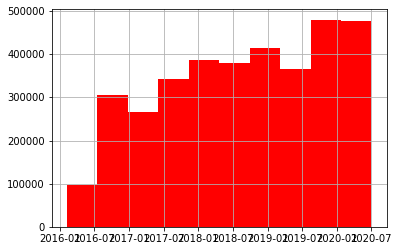

In [37]:
df["Start_Time"].hist(facecolor='r')

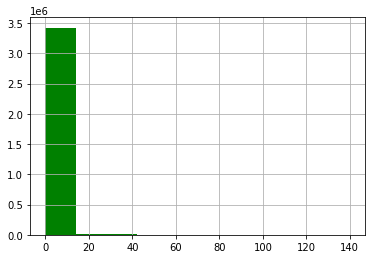

In [40]:
df["Visibility(mi)"].hist(facecolor='g')

In [43]:
df.Weather_Condition

0             Light Rain
1             Light Rain
2               Overcast
3          Mostly Cloudy
4          Mostly Cloudy
               ...      
3513612             Fair
3513613             Fair
3513614    Partly Cloudy
3513615             Fair
3513616             Fair
Name: Weather_Condition, Length: 3513617, dtype: object

In [46]:
df['Weather_Condition'].unique()

array(['Light Rain', 'Overcast', 'Mostly Cloudy', 'Rain', 'Light Snow',
       'Haze', 'Scattered Clouds', 'Partly Cloudy', 'Clear', 'Snow',
       'Light Freezing Drizzle', 'Light Drizzle', 'Fog', 'Shallow Fog',
       'Heavy Rain', 'Light Freezing Rain', 'Cloudy', 'Drizzle', nan,
       'Light Rain Showers', 'Mist', 'Smoke', 'Patches of Fog',
       'Light Freezing Fog', 'Light Haze', 'Light Thunderstorms and Rain',
       'Thunderstorms and Rain', 'Fair', 'Volcanic Ash', 'Blowing Sand',
       'Blowing Dust / Windy', 'Widespread Dust', 'Fair / Windy',
       'Rain Showers', 'Mostly Cloudy / Windy', 'Light Rain / Windy',
       'Hail', 'Heavy Drizzle', 'Showers in the Vicinity', 'Thunderstorm',
       'Light Rain Shower', 'Light Rain with Thunder',
       'Partly Cloudy / Windy', 'Thunder in the Vicinity', 'T-Storm',
       'Heavy Thunderstorms and Rain', 'Thunder', 'Heavy T-Storm',
       'Funnel Cloud', 'Heavy T-Storm / Windy', 'Blowing Snow',
       'Light Thunderstorms and Snow',

In [48]:
df['Weather_Condition'] = df['Weather_Condition'].mask(df['Weather_Condition'].str.contains('Clear|Fair',na=False), 'Clear')
df['Weather_Condition'] = df['Weather_Condition'].mask(df['Weather_Condition'].str.contains('Cloud|Overcast|Mostly Cloudy|Scattered Clouds',na=False), 'Cloud')
df['Weather_Condition'] = df['Weather_Condition'].mask(df['Weather_Condition'].str.contains('Mostly Cloudy|Scattered Clouds|Partly Cloudy',na=False), 'Mostly Cloudy')
df['Weather_Condition'] = df['Weather_Condition'].mask(df['Weather_Condition'].str.contains('storm|T-Storm|Thunder',na=False), 'Storm')
df['Weather_Condition'] = df['Weather_Condition'].mask(df['Weather_Condition'].str.contains('Heavy Rain|Rain Shower|Vicinity',na=False), 'Heavy_Rain')
df['Weather_Condition'] = df['Weather_Condition'].mask(df['Weather_Condition'].str.contains('Snow|Sleet|Ice',na=False), 'Snow')
df['Weather_Condition'] = df['Weather_Condition'].mask(df['Weather_Condition'].str.contains('Heavy Snow|Heavy Sleet|Heavy Ice Pellets|Snow Showers|Squalls',na=False), 'Heavy_Snow')
df['Weather_Condition'] = df['Weather_Condition'].mask(df['Weather_Condition'].str.contains('Fog|Haze|Mist|Smoke|Light Haze',na=False), 'Fog')
df['Weather_Condition'] = df['Weather_Condition'].mask(df['Weather_Condition'].str.contains('Drizzle|Heavy Freezing Drizzle|Light Freezing Drizzle|Light Drizzle|Heavy Drizzle',na=False), 'Drizzle')
df['Weather_Condition'] = df['Weather_Condition'].mask(df['Weather_Condition'].str.contains('Volcanic|Sand|Dust|Tornado|Whirls',na=False), 'Uncommon weather conditions')

In [49]:
df['Weather_Condition'].unique()

array(['Light Rain', 'Cloud', 'Rain', 'Snow', 'Fog', 'Clear', 'Drizzle',
       'Heavy_Rain', 'Light Freezing Rain', nan, 'Storm',
       'Misc weather disturbances', 'Light Rain / Windy', 'Hail',
       'N/A Precipitation', 'Rain / Windy', 'Heavy Freezing Rain',
       'Small Hail', 'Wintry Mix', 'Wintry Mix / Windy',
       'Light Freezing Rain / Windy', 'Freezing Rain', 'Light Hail',
       'Freezing Rain / Windy'], dtype=object)